In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
students = Table().read_table('student_data.csv')


### Hypothesis Testing Based on Simulations

1. State the null and alternative hypothesis
2. Pick a test statistic
3. Simulate the sampling distribution of the test statistic, under the null model
4. Draw conclusion with regard to null model based on the p-value, using the distribution generated from Step 3. A significance level of 0.05 was often used to decide whether the p-value is significant enough. 


#### Example 1: Swain v.s. Alabama

In the Swain v.s. Alabama (1965) case, Robert Swain believes that the jury panel that convicted him under-represented the population of eligible jurors, among which 26% were black. In the jury panel of 100 jurors, only 8 were black. The Supreme court opinion stated "the overall percentage disparity has been small". 

What are the null and alternative models? 

Null: the percentage of black jurors in the jury panels is 26%
Alternative: the percentage of black jurors in the jury panels is less than 26%

In the following code, what is the test statistic used in the simulation? 

Number of  black jurors in a panel of 100.

In [3]:
def sampling_distribution_black(n, prop):
    results = [] 
    proportions = make_array(prop, 1-prop)   
    for i in np.arange(100000):
        results = np.append(results, sample_proportions(n, proportions).item(0)*100)
    return results

How do you find the p-value based on the following distribution? 

Find the percentage of test statistics that are less than or equal to 8. Each simulation will be different, but the p-value is approximately 1 in 100000

1e-05

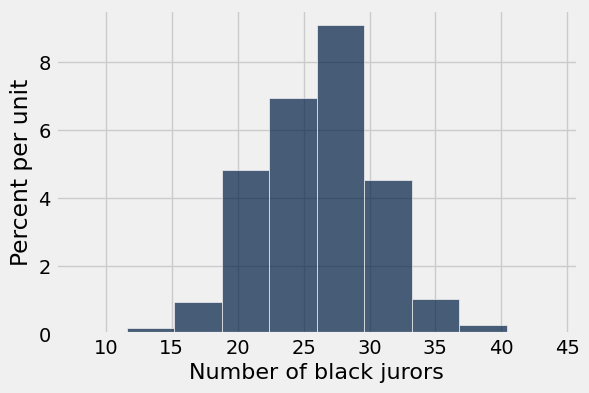

In [9]:
results = sampling_distribution_black(100, 0.26)
Table().with_column('Number of black jurors', results).hist()

np.count_nonzero(results <= 8) / 100000

What is the overall conclusion from the hypothesis test? 

Since the P-value is very small. We decided that the data is strong evidence against the null hypothesis, there is a good evidence for the under-representation of black jurors. 

If in the county, instead of 26% of the jurors, 12% of the jurors are black. Re-run the simulation based on the new null model. What is the conclusion of this hypothesis test? 

0.13796

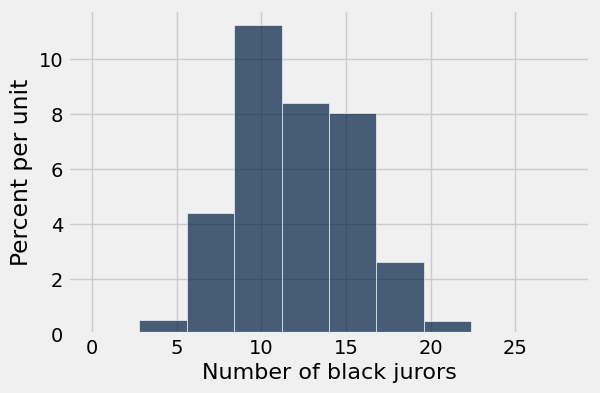

In [10]:
results = sampling_distribution_black(100, 0.12)
Table().with_column('Number of black jurors', results).hist()

np.count_nonzero(results <= 8) / 100000

The p-value is 0.138, which is higher than the cutoff of 0.05. Thus the data is consistent with the null hypothesis. There is not enough evidence for the under-representation. 

#### Example 2: The psychic octopus. 

During the 2010 World Cup tournament, Paul the Octopus (in a German aquarium) became famous for correctly predicting the winner in all 8 games it was asked to predict.  (Two containers of food were lowered into Paul’s tank, each with a flag of the opposing teams.  He made a selection by choosing which container to eat from. Is this evidence that Paul has psychic powers and can choose correctly more than half the time?

What are the null and alternative models? 

Null: Paul's success rate is 50%
Alternative: Paul's success rate is higer than 50% 

Use the same test statistic as Swain v.s. Alabama, simulate a sampling distribution for the test statistic, and use it to complete the hypothesis test. 

0.0039

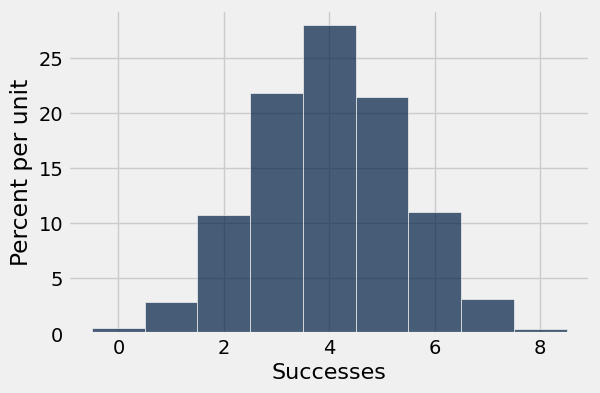

In [15]:
def sampling_distribution_paul(n, prop):
    results = [] 
    proportions = make_array(prop, 1-prop)   
    for i in np.arange(10000):
        results = np.append(results, sample_proportions(n, proportions).item(0)*n)
    return results

results = sampling_distribution_paul(8, 0.5)
Table().with_column('Successes', results).hist(bins=np.arange(-0.5, 9, 1))
np.count_nonzero(results >= 8) / 10000

The p-value is approximatley 0.004, which is less than 0.05. Thus the data is against with the null hypotheisis. Paul may be special (one in 300 octopi bahaves like this).

Suppose a different and less psychically powerful octopus named "Polly" only got 6 correct out of 8.  Will the p-value be more than or less than the p-value for Paul the Octopus? Estimate this new p-value using the same sampling distribution shown above and draw a conclusion with respect to this hypothesis test. 

In [16]:
np.count_nonzero(results >= 6) / 10000

0.1455

Polly's p-value is 0.146 > 0.05. Thus the data is consistent with the null hypothesis. Polly is not special. 

#### Example 3: the loaded die

A gambler at the Graton Casino observed 120 dice rolls and noticed that the number of rolls were not perfectly even. Specifically, he counted the following frequencies for each side of the die: (18, 21, 19, 23, 24, 15). He suspects the die may be loaded. 

What are the null and alternative models? 

Null: the die is fair (each side has 1/6 chance)

Alternative: the die is not fair (at least one side is not 1/6)


Based on the following code, what is value of the test statistic given the observed data? Complete the definition of the ```fair_die``` based on the null model.    

0.0666666666667


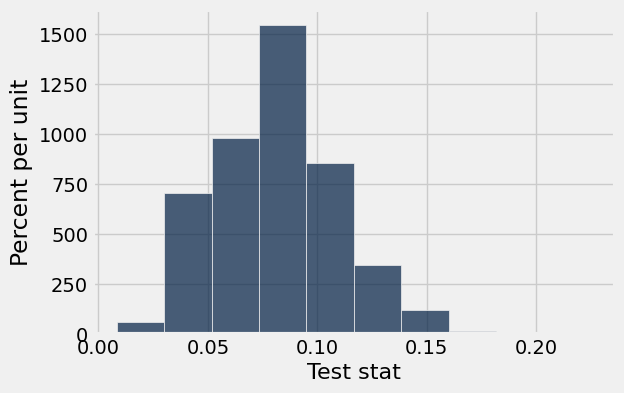

In [18]:
dice_data = make_array(18, 21, 19, 23, 24, 15)

def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

fair_die = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

results = make_array()
for i in np.arange(10000):
    test_stat = tvd(sample_proportions(120, fair_die), fair_die)
    results = np.append(results, test_stat)
Table().with_column('Test stat', results).hist()

print(tvd(dice_data/120, fair_die))

Based on the simulated sampling distribution, what is the p-value and the conclusion of the test? 

In [21]:
np.count_nonzero(results >= tvd(dice_data/120, fair_die)) / 10000

# p-value is high. The data is consistent with the null. The die may be fair. 

0.6705

Imagine now instead of 120 rolls, there are 1200 dice rolls, and the frequencies were 10 times larger. Repeat the hypothesis test. Does the conclusion change? 

3e-05

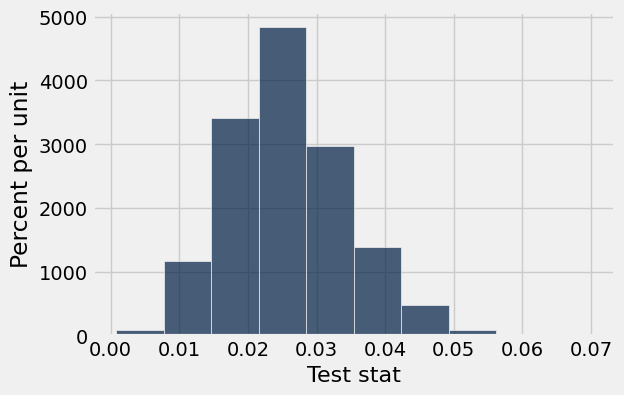

In [31]:
dice_data = dice_data = make_array(18, 21, 19, 23, 24, 15) * 10
dice_data / 1200
results = make_array()
for i in np.arange(100000):
    test_stat = tvd(sample_proportions(1200, fair_die), fair_die)
    results = np.append(results, test_stat)
Table().with_column('Test stat', results).hist()

np.count_nonzero(results >= tvd(dice_data/1200, fair_die)) / 100000

# the p-value is much smaller (<1.0e-05). So this is strong evidence against the null. The die is loaded. 

#### Example 4: Testing whether one group mean is different

Based on the student data in ```student_data.csv```, suppose we want to test the hypothesis that students who do not use social networking sites tend to be older in terms of average age. 

What is are the null and alternative models? 

Null: people who don't use social networks have the same mean as the rest of the students. 

Alternative: people who don't use social networks have a higher mean as the rest of the students. 

Suppose we use the average age as the test statistic. Does the following output appear to support the null or alternative model? 

In [32]:
students.group('SOCIAL', np.average)

SOCIAL,SEX average,COLOR average,ZIP average,MATH average,PAPER average,CAR average,SHOE average,AGE average,HEIGHT average,PETS average
No,,,93893.4,2.9,3.15,nan,8.775,22.95,67.15,1.5
Yes,,,95323.3,2.77778,2.81481,nan,9.11111,22.1296,67.3519,2


In [33]:
students.group('SOCIAL')

SOCIAL,count
No,20
Yes,54


In the following code, what is the test statistic? What is the p-value and conclusion of the hypothesis test based on the student data? 

The test statistic is the sample mean of a randomly selected of 20 students. The p-vaue is 0.316 > 0.05. So the data is consistent with the null. There is no evidence to show people who don't use social network are older. 

0.3156

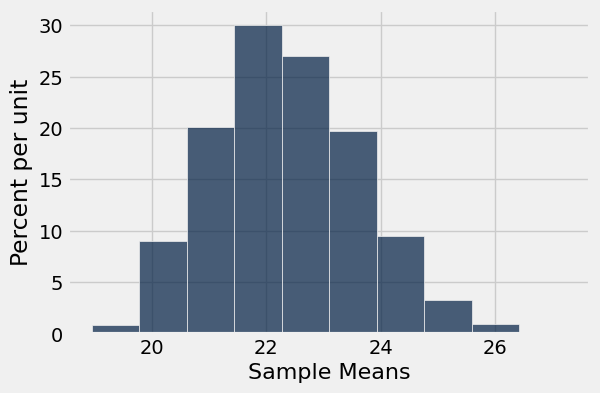

In [34]:
def sampling_distribution_mean(n, variable):
    random_group = students.sample(n, with_replacement=False)
    return np.average(random_group.column(variable))

sample_means = make_array()
for i in np.arange(10000):
    sample_means = np.append(sample_means, sampling_distribution_mean(20, 'AGE'))

Table().with_column('Sample Means', sample_means).hist()

np.count_nonzero(sample_means>=22.95) / 10000

Now modify the code and use it to test the hypothesis that on average, female students own more pets than male students. 

In [38]:
students.group('SEX', np.average)

SEX,COLOR average,ZIP average,MATH average,PAPER average,CAR average,SHOE average,AGE average,HEIGHT average,PETS average,SOCIAL average
Female,,95336.7,2.7561,3.14634,nan,8.39024,23.2195,65.7805,2.46341,
Male,,94440,2.87879,2.60606,nan,9.80303,21.2727,69.1818,1.12121,


In [39]:
students.group('SEX')

SEX,count
Female,41
Male,33


0.0004

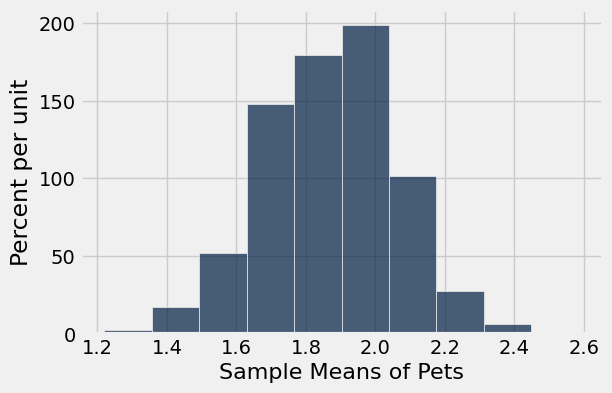

In [41]:
def sampling_distribution_mean(n, variable):
    random_group = students.sample(n, with_replacement=False)
    return np.average(random_group.column(variable))

sample_means = make_array()
for i in np.arange(10000):
    sample_means = np.append(sample_means, sampling_distribution_mean(41, 'PETS'))

Table().with_column('Sample Means of Pets', sample_means).hist()

np.count_nonzero(sample_means>=2.463) / 10000

#p-value < 0.001, so there is evidence that female students own more pets than males on average. 

#### Example 5: A/B Testing 

In A/B testing, we ask whether the two samples are likely from the same population. Instead of using the sample mean as the test statistic as in Example 4, we use the difference between the two sample means as the test statistic. 

Use the student data to test there is a significance difference in average height between female and male students. 

In [44]:
def difference_of_means(table, variable):
    subtable = table.select('SEX', variable)
    means_table = subtable.group('SEX', np.average)
    means = means_table.column(1)
    return means.item(0) - means.item(1)

difference_of_means(students, 'HEIGHT')

-3.4013303769401375

What are the null and alternative models? 

Null: the female and male students have the same average height. 

Alternative: the average height for females should be shorter. 

What is the value of the test statistic? 

The difference in the means of two randomly generated samples without replacement, one with 41 students, the other with 33. 

Under the null model, the sampling distribution of the test statistic was generated using a technique called "label shuffling"  

In [42]:
shuffled_sex = students.sample(with_replacement = False)
shuffled_students = students.drop('SEX').with_column('SEX', shuffled_sex.column('SEX'))
shuffled_students


COLOR,ZIP,MATH,PAPER,CAR,SHOE,AGE,HEIGHT,PETS,SOCIAL,SEX
Blue,95403,3,2,2018,6.5,20,61,0,Yes,Female
Other,95401,2,5,2007,6.5,26,61,1,No,Female
Green,95492,1,3,1994,5.5,22,62,4,Yes,Male
Black,95472,3,3,nan,8,19,62,2,Yes,Female
Purple,95409,2,2,1990,7,19,63,3,Yes,Male
Orange,95407,4,3,2016,8.5,37,63,2,Yes,Female
Blue,95401,5,4,2003,8,17,63,5,Yes,Male
Blue,94928,3,3,2012,7.5,18,63,6,Yes,Male
Purple,95403,4,5,nan,8.5,36,63,0,No,Male
Red,95404,2,2,2011,7.5,20,64,7,Yes,Female


Use the code provided above, create a simulation of the sampling distribution of the test statistic. Each iteration should shuffle the labels once, and use ```difference_of_means``` to compute the test statistic. 

In [45]:
results = make_array()
for i in np.arange(10000):
    shuffled_sex = students.sample(with_replacement = False)
    shuffled_students = students.drop('SEX').with_column('SEX', shuffled_sex.column('SEX'))
    diff = difference_of_means(shuffled_students, 'HEIGHT')
    results = np.append(results, diff)

Use the simulated sampling distribution to compute the p-value and draw the conclusion. 

0.0

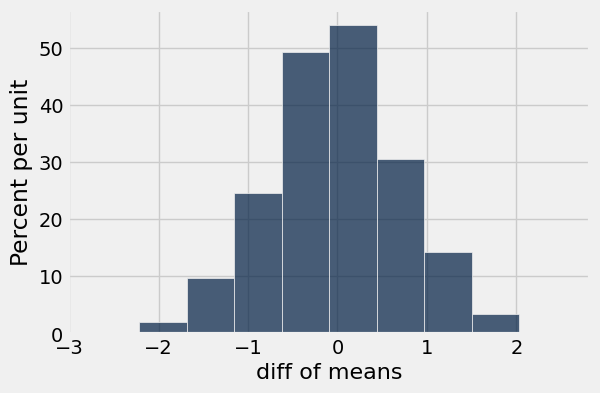

In [47]:
Table().with_column('diff of means', results).hist()
np.count_nonzero(results < -3.401)/10000

the p-value is almost 0. Thus the data is consistent with the null hypothesis. Female students on average are shorter than male students. 

Can you use the same procedure to test whether there is a difference in the attitude towards Math among male and female students? 

In [50]:
difference_of_means(students, 'MATH')
results = make_array()
for i in np.arange(10000):
    shuffled_sex = students.sample(with_replacement = False)
    shuffled_students = students.drop('SEX').with_column('SEX', shuffled_sex.column('SEX'))
    diff = difference_of_means(shuffled_students, 'MATH')
    results = np.append(results, diff)

0.2456

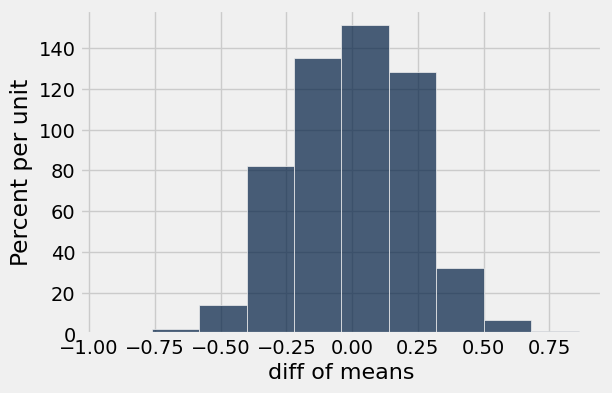

In [51]:
Table().with_column('diff of means', results).hist()
np.count_nonzero(results < difference_of_means(students, 'MATH'))/10000

# female students are slightly less interested in Math, but the difference is not significant (p-value = 0.25)

#### Example 6: Label Shuffling for Categorical Data

The following data records an experiment on whether Lithium was effective in preventing cocaine users from relapsing. In the column labeled "Result", 1 represents relapse (returning to cocaine use), and 0 presents no relapse. 

In [ ]:
coke = Table().read_table('cocaine_lithium.csv')
coke.show(3)
coke.pivot('Result', 'Group')

The following function is used to compute the test statistic, based on a table similar to ```coke```. What does the test statistic compute in terms of the original data? 

In [ ]:
def distance(table, group_label):
    proportions = table.group(group_label, np.average).column(1)
    print(proportions)
    return abs(proportions.item(1) - proportions.item(0))

distance(coke, 'Group')

The code below uses a similar technique as in Lecture 20: Causality to determine to shuffle the labels under "Group" to produce another sample under the null hypothesis (Lithium and Placebo has the same rate of relapse). Run the code a few times and describe what happens after each shuffle. 

In [ ]:
def one_shuffle(table):
    shuffled_labels = table.sample(with_replacement = False).column('Group')
    shuffled_table = table.select('Group', 'Result').with_column(
        'Shuffled', shuffled_labels)
    return shuffled_table


coke_shuffled = one_shuffle(coke)
coke_shuffled.show(10)
coke_shuffled.pivot('Result','Shuffled')

In [ ]:
distance(coke_shuffled.drop('Group'), 'Shuffled')

Write code to simulate 10000 values of the test statistic based on the ```distance``` and ```one_shuffle``` functions defined above. Plot the histogram of the sampling distribution.

Based on the test statistic from the original data, write some code to answer the question: what is the p-value of this test? If you were a doctor, would you recommend the Lithium treatment to your patients? 

Now use the same technique and the same test statistic, conduct another hypothesis test to answer the question: based on the student data, do female students tend to use socal media more than male students? (Hint: you can re-use the code above by converting the student data to a similar table)